In [1]:
#Import all the necessary packages:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt

from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [3]:
econ = pd.read_csv('Ecommerce_data.csv')

econ.head()

Sale  por_OS  por_NON  recc  avg_no_it   age     dis  diff_reg  tax  \
0  0.63    18.0     2.31     0      6.575  65.2  4.0900         1  296   
1  2.73     0.0     7.07     0      6.421  78.9  4.9671         2  242   
2  2.73     0.0     7.07     0      7.185  61.1  4.9671         2  242   
3  3.24     0.0     2.18     0      6.998  45.8  6.0622         3  222   
4  6.91     0.0     2.18     0      7.147  54.2  6.0622         3  222   

       bk  lowstat  Median_s  
0  396.90     4.98      24.0  
1  396.90     9.14      21.6  
2  392.83     4.03      34.7  
3  394.63     2.94      33.4  
4  396.90     5.33      36.2

In [36]:
econ.describe()

Sale      por_OS     por_NON        recc   avg_no_it         age  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    47.565425   11.363636   11.136779    0.069170    6.284634   68.574901   
std     83.450161   23.322453    6.860353    0.253994    0.702617   28.148861   
min      0.630000    0.000000    0.460000    0.000000    3.561000    2.900000   
25%      8.205000    0.000000    5.190000    0.000000    5.885500   45.025000   
50%     19.600000    0.000000    9.690000    0.000000    6.208500   77.500000   
75%     56.691000   12.500000   18.100000    0.000000    6.623500   94.075000   
max    889.762000  100.000000   27.740000    1.000000    8.780000  100.000000   

              dis    diff_reg         tax          bk     lowstat    Median_s  
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  
mean     3.795043    9.549407  408.237154  356.674032   12.653063   22.532806  
std      2.105710    8.707259  168.537116   91.294864    7.141062    9.197104  
min      1.129600    1.000000  187.000000    0.320000    1.730000    5.000000  
25%      2.100175    4.000000  279.000000  375.377500    6.950000   17.025000  
50%      3.207450    5.000000  330.000000  391.440000   11.360000   21.200000  
75%      5.188425   24.000000  666.000000  396.225000   16.955000   25.000000  
max     12.126500   24.000000  711.000000  396.900000   37.970000   50.000000

In [4]:
econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sale       506 non-null    float64
 1   por_OS     506 non-null    float64
 2   por_NON    506 non-null    float64
 3   recc       506 non-null    int64  
 4   avg_no_it  506 non-null    float64
 5   age        506 non-null    float64
 6   dis        506 non-null    float64
 7   diff_reg   506 non-null    int64  
 8   tax        506 non-null    int64  
 9   bk         506 non-null    float64
 10  lowstat    506 non-null    float64
 11  Median_s   506 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 47.6 KB


In [6]:
econ.corr()['Median_s']

Sale        -0.371825
por_OS       0.360445
por_NON     -0.483725
recc         0.175260
avg_no_it    0.695360
age         -0.376955
dis          0.249929
diff_reg    -0.381626
tax         -0.468536
bk           0.333461
lowstat     -0.737663
Median_s     1.000000
Name: Median_s, dtype: float64

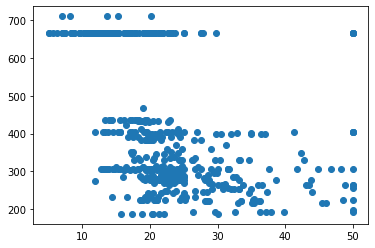

In [10]:
plt.scatter(econ['Median_s'], econ['tax'])

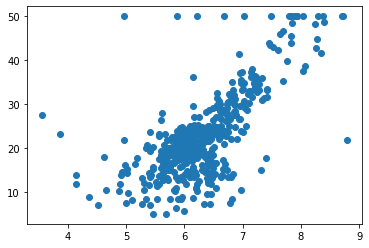

In [35]:
plt.scatter(econ['avg_no_it'], econ['Median_s'])

In [12]:
x = econ[['avg_no_it', 'tax']]
y = econ['Median_s']

In [13]:
from sklearn.model_selection import train_test_split

x_test, x_train, y_test, y_train = train_test_split(x,y, test_size=0.2, 
                                                    random_state=100)

In [16]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [17]:
print('Model intercept:', model.intercept_)
print(' Model Coefficient:')
list(zip(x,model.coef_))

Model intercept: -25.06772112854783
 Model Coefficient:


[('avg_no_it', 8.70311219689505), ('tax', -0.01848508167900344)]

In [18]:
y_pred = model.predict(x_test)

In [22]:
act_pred_diff = pd.DataFrame({'Actual':y_test, 'Prediction':y_pred})

act_pred_diff
                              


Actual  Prediction
379    10.2   16.780682
311    22.1   22.593267
157    41.3   27.908499
244    17.6   17.508708
56     24.7   24.698413
..      ...         ...
343    23.9   26.368838
359    22.6   15.814636
323    18.5   19.304425
280    45.4   38.997839
8      16.5   18.190643

[404 rows x 2 columns]

In [24]:
new_avg_it = 10.10
new_tax = 300

print('the predicted median value is:', model.predict([[new_avg_it, new_tax]]))

the predicted median value is: [57.28818756]


/Users/hamdihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
print('R-squared is:', model.score(x_test, y_test)*100)

R-squared is: 53.92199079548017


The r-squared value indicates that 53.92% of the data fits the model

In [32]:
MAE = metrics.mean_absolute_error(y_test, y_pred)

print('The MAE is:', MAE)

The MAE is: 3.989746592177906


Mean Absolute Error: Mean Absolute Error is the absolute difference between the actual or true values and the predicted values. The lower the value, the better is the model’s performance. A mean absolute error of 0 means that your model is a perfect predictor of the outputs. The mean absolute error obtained for this particular model is 3.98, which is pretty good as it is close to 0.

In [33]:
MSE = metrics.mean_squared_error(y_test, y_pred)

print('The MSE is:', MSE)

The MSE is: 37.46469617367121


In [34]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('The RMSE is:', RMSE)

The RMSE is: 6.120841132856759


In [44]:
# check multicollinearity

x_temp = sm.add_constant(x_train) # multicolinearity

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif['Features'] = x_temp.columns
print(vif.round(1))

   VIF Factor   Features
0       116.2      const
1         1.1  avg_no_it
2         1.1        tax


/Users/hamdihassan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


the variance inflation factor(vif) is  1.1 which is very close to one. This means that that two variables are not correlated and its good news.